[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


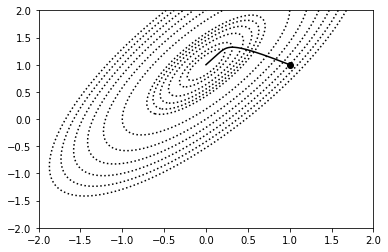

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gd

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

algo = gd.GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)

xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape),
            levels=levels,
            colors="k", linestyles="dotted")

plt.show()




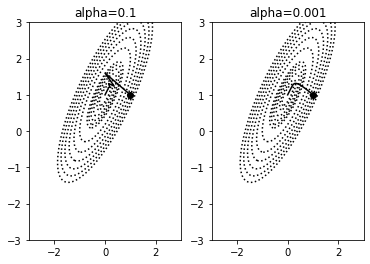

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import gd

def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])
xmin, xmax, ymin, ymax = -3, 3, -3, 3

algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.001]

for alpha in alphas:
    algo = gd.GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)
# print(algo.x_)
# print(algo.opt_)

xs = np.linspace(xmin, xmax, 300)
ys = np.linspace(ymin, ymax, 300)


xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]


for i in range(2):
    ax[i].set_xlim((xmin, xmax))
    ax[i].set_ylim((ymin, ymax))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape),
            levels=levels,
            colors="k", linestyles="dotted")
    
plt.show()